In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
infile = open('/content/drive/MyDrive/x_train_file2','rb')
X = pickle.load(infile)
infile.close()

In [ ]:
img_size = 224
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
infile = open('/content/drive/MyDrive/y_train_file2','rb')
y = pickle.load(infile)
infile.close()

Y = np.array(y)

In [ ]:
infile = open('/content/drive/MyDrive/x_test_file','rb')
X_test = pickle.load(infile)
infile.close()

In [ ]:
img_size = 224
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [ ]:
infile = open('/content/drive/MyDrive/y_test_file','rb')
y_test = pickle.load(infile)
infile.close()

Y_test = np.array(y_test)

In [ ]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
for layer in new_model.layers:
	layer.trainable = False

In [ ]:
new_model.get_layer('dense').trainable = True
new_model.get_layer('activation').trainable = True
new_model.get_layer('dense_1').trainable = True
new_model.get_layer('activation_1').trainable = True
new_model.get_layer('dense_2').trainable = True

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = new_model.fit(X, Y, epochs = 25,validation_data =(X_test[:3687], Y_test[:3687]), callbacks =[earlystopping])

Epoch 1/25
577/577 [==============================] - 578s 997ms/step - loss: 1.7731 - accuracy: 0.2685 - val_loss: 1.7382 - val_accuracy: 0.2908
Epoch 2/25
577/577 [==============================] - 573s 993ms/step - loss: 1.6826 - accuracy: 0.3225 - val_loss: 1.6650 - val_accuracy: 0.3303
Epoch 3/25
577/577 [==============================] - 573s 994ms/step - loss: 1.6476 - accuracy: 0.3408 - val_loss: 1.6403 - val_accuracy: 0.3458
Epoch 4/25
577/577 [==============================] - 572s 992ms/step - loss: 1.6121 - accuracy: 0.3606 - val_loss: 1.6296 - val_accuracy: 0.3477
Epoch 5/25
577/577 [==============================] - 573s 993ms/step - loss: 1.5867 - accuracy: 0.3729 - val_loss: 1.6214 - val_accuracy: 0.3548
Epoch 6/25
577/577 [==============================] - 573s 993ms/step - loss: 1.5602 - accuracy: 0.3840 - val_loss: 1.6032 - val_accuracy: 0.3515
Epoch 7/25
577/577 [==============================] - 574s 995ms/step - loss: 1.5495 - accuracy: 0.3945 - val_loss: 1.5891 -

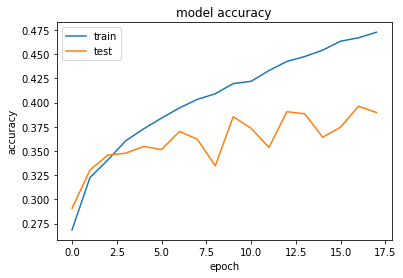

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

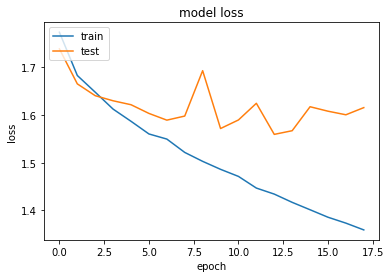

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
new_model.save('mobilenet_model_9507.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
new_model.save('/content/drive/MyDrive/mobilenet_model_9507.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
frame = cv2.imread('/content/drive/MyDrive/disgusted1.jpg')

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(faces) == 0:
    print("face not detected")
  else:
    for (ex, ey, ew, eh) in facess:
      face_roi = roi_color[ey: ey+eh, ex:ex + ew]

final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
Predictions = new_model.predict(final_image)
np.argmax(Predictions)

5